# Telecom Churn - Case Study

In [334]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Load Data

In [335]:
# Read data

df = pd.read_csv("telecom_churn_data.csv")
df.head()

df_original = df.copy()

# Data Analysis and Preparation

Lets Look at all columns and remove unrequired columns

In [336]:
df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [337]:
df

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [338]:
# lets check nulls in total_rech_amt_6 and total_rech_amt_7

df.loc[:, ['total_rech_amt_6','total_rech_amt_7']].isna().sum()

total_rech_amt_6    0
total_rech_amt_7    0
dtype: int64

In [339]:
# Lets filter data based on requirement
# Those who have recharged with an amount more than or equal to X, 
# where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

df.loc[:, 'total_reach_amt_67'] = df[['total_rech_amt_6','total_rech_amt_7']].mean(axis=1)

In [340]:
df['total_reach_amt_67']

0        307.0
1        229.0
2        241.5
3        270.0
4        273.0
         ...  
99994     85.0
99995    110.0
99996     59.5
99997    369.5
99998    355.0
Name: total_reach_amt_67, Length: 99999, dtype: float64

In [341]:
df['total_reach_amt_67'].describe(percentiles=[0.7])

count    99999.000000
mean       325.238792
std        370.833466
min          0.000000
50%        229.000000
70%        368.500000
max      37762.500000
Name: total_reach_amt_67, dtype: float64

In [342]:
# Filter DataFrame

df = df[df['total_reach_amt_67'] >= df['total_reach_amt_67'].quantile(0.7)]

In [343]:
# lets check length of df

df.shape

(30011, 227)

## Derive Churn
We can check if there are any nulls in the columns basaed on which we are going to derive Churn vs non Churn
The columns are - total_ic_mou_9, total_og_mou_9, vol_2g_mb_9, vol_3g_mb_9

In [344]:
# checking nulls in required columns

df[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].isna().sum()

total_ic_mou_9    0
total_og_mou_9    0
vol_2g_mb_9       0
vol_3g_mb_9       0
dtype: int64

In [345]:
# as there are no nulls, we can tag the record as Churn = True/False based on the condition

churn = df.loc[:, ['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].sum(axis=1) == 0
df.loc[:, 'churn'] = churn

C:\Users\adi00\Anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\adi00\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [346]:
# lets drop all columns which are corresponding to 9th month

columns_to_remove = df.columns[df.columns.str.find('_9') != -1]
df = df.drop(columns_to_remove, axis = 1)

In [347]:
df

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_reach_amt_67,churn
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.00,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,6/27/2014,7/25/2014,8/26/2014,0,0,779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,802,57.74,19.38,18.74,0.0,1185.0,True
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.00,0.00,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00

In [348]:
# sep_vbc_3g column can be dropped
# Date columns are not required. Lets drop all date columns
# Also, we can remove some columns which are not useful

columns_to_remove = ['mobile_number','circle_id', 'sep_vbc_3g',
                     'last_date_of_month_6','last_date_of_month_7','last_date_of_month_8',
                     'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8',
                     'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8']
df = df.drop(columns_to_remove, axis=1)

In [349]:
df

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_reach_amt_67,churn
7,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.00,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,802,57.74,19.38,18.74,1185.0,True
8,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.00,0.00,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,NaN,2.0,3.0,NaN,154.0,23.0,NaN,2.0,3.0,NaN,0.0,0.0,NaN,177.0,69.0,0.00,356.00,0.03,0.00,750.95,11.94,NaN,0.00,19.83,NaN,0.00,0.00,NaN,0.0,0.0,0,1,0,0,1,3,0,0,0,0,0,0,NaN,1.0,1.0,315,21.03,910.65,122.16,519.0,False
13,0.0,0.0,0.0,492.8

## Missing value treatment

In [350]:
# check nulls

round(df.isna().sum()/len(df)*100, 2)

loc_og_t2o_mou         0.38
std_og_t2o_mou         0.38
loc_ic_t2o_mou         0.38
arpu_6                 0.00
arpu_7                 0.00
arpu_8                 0.00
onnet_mou_6            1.05
onnet_mou_7            1.01
onnet_mou_8            3.13
offnet_mou_6           1.05
offnet_mou_7           1.01
offnet_mou_8           3.13
roam_ic_mou_6          1.05
roam_ic_mou_7          1.01
roam_ic_mou_8          3.13
roam_og_mou_6          1.05
roam_og_mou_7          1.01
roam_og_mou_8          3.13
loc_og_t2t_mou_6       1.05
loc_og_t2t_mou_7       1.01
loc_og_t2t_mou_8       3.13
loc_og_t2m_mou_6       1.05
loc_og_t2m_mou_7       1.01
loc_og_t2m_mou_8       3.13
loc_og_t2f_mou_6       1.05
loc_og_t2f_mou_7       1.01
loc_og_t2f_mou_8       3.13
loc_og_t2c_mou_6       1.05
loc_og_t2c_mou_7       1.01
loc_og_t2c_mou_8       3.13
loc_og_mou_6           1.05
loc_og_mou_7           1.01
loc_og_mou_8           3.13
std_og_t2t_mou_6       1.05
std_og_t2t_mou_7       1.01
std_og_t2t_mou_8    

In [351]:
df[df.churn].isna().sum()/len(df[df.churn]) * 100

loc_og_t2o_mou         1.966834
std_og_t2o_mou         1.966834
loc_ic_t2o_mou         1.966834
arpu_6                 0.000000
arpu_7                 0.000000
arpu_8                 0.000000
onnet_mou_6            4.087929
onnet_mou_7            6.131894
onnet_mou_8           28.384111
offnet_mou_6           4.087929
offnet_mou_7           6.131894
offnet_mou_8          28.384111
roam_ic_mou_6          4.087929
roam_ic_mou_7          6.131894
roam_ic_mou_8         28.384111
roam_og_mou_6          4.087929
roam_og_mou_7          6.131894
roam_og_mou_8         28.384111
loc_og_t2t_mou_6       4.087929
loc_og_t2t_mou_7       6.131894
loc_og_t2t_mou_8      28.384111
loc_og_t2m_mou_6       4.087929
loc_og_t2m_mou_7       6.131894
loc_og_t2m_mou_8      28.384111
loc_og_t2f_mou_6       4.087929
loc_og_t2f_mou_7       6.131894
loc_og_t2f_mou_8      28.384111
loc_og_t2c_mou_6       4.087929
loc_og_t2c_mou_7       6.131894
loc_og_t2c_mou_8      28.384111
loc_og_mou_6           4.087929
loc_og_m

In [352]:
# Lets check rows with maximum nulls

row_null_count = df.isna().sum(axis=1)
row_null_count.sort_values(ascending=False)

57525    117
30548    117
96449    117
32368    117
74778    117
        ... 
33967      0
33959      0
82735      0
33917      0
99997      0
Length: 30011, dtype: int64

In [353]:
# lets check such rows wih 117 missing values

df.loc[row_null_count[row_null_count==117].index]

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_reach_amt_67,churn
3506,NaN,NaN,NaN,996.558,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,0,0,875,0,0,550,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2033,0.00,0.00,0.00,437.5,True
4190,NaN,NaN,NaN,2502.516,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,0,0,2555,0,0,655,0,0,550,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,266,0.00,0.00,303.54,1277.5,True
5539,NaN,NaN,NaN,249.000,243.106,374.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,

Looks like above rows have all columns null except for month 6. In our analysis we are considering that month 6 and 7 are good phase and 8 as action phase. Since these customers could not give us the insight based on our assumption. We should drop these rows where 117 columns have null values. These rows have around 70% values null

In [354]:
# dropping rows

df = df.drop(row_null_count[row_null_count==117].index)
df.shape

(29989, 162)

In [355]:
# check nulls

pd.DataFrame(round(df.isna().sum()/len(df)*100, 2)).sort_values(by=[0],ascending=False)

,0
night_pck_user_6,62.00
max_rech_data_6,62.00
arpu_2g_6,62.00
fb_user_6,62.00
total_rech_data_6,62.00
arpu_3g_6,62.00
count_rech_2g_6,62.00
av_rech_amt_data_6,62.00
count_rech_3g_6,62.00
arpu_2g_7,61.11


In [356]:
# check columns where are more than 50%. We can remove these columns 

columns_to_remove = df.loc[:, round(df.isna().sum()/len(df)*100, 2) > 50].columns
columns_to_remove

# dropping columns with more than 50% nulls

df = df.drop(columns_to_remove, axis=1)

In [357]:
# check nulls

pd.DataFrame(round(df.isna().sum()/len(df)*100, 2)).sort_values(by=[0],ascending=False)

,0
std_ic_mou_8,3.05
loc_og_t2t_mou_8,3.05
loc_og_t2f_mou_8,3.05
std_ic_t2m_mou_8,3.05
loc_og_t2c_mou_8,3.05
loc_ic_t2m_mou_8,3.05
std_og_t2t_mou_8,3.05
std_ic_t2t_mou_8,3.05
std_og_t2m_mou_8,3.05
std_og_t2f_mou_8,3.05


In [358]:
# lets check the nulls in 6th and 7th month (good phase)

df[df.std_ic_mou_6.isna() & df.std_ic_mou_7.isna()]

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_reach_amt_67,churn
1489,0.0,0.0,0.0,600.339,76.826,986.809,NaN,NaN,0.00,NaN,NaN,6.96,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,6.96,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,6.96,NaN,NaN,0.0,0.0,0.0,6.96,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.00,0.0,0.0,0.00,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,2,2,5,707,91,1162,455,91,455,455,0,252,87.65,230.56,42.79,3220.44,14.59,4407.08,0,0,0,0,0,0,2,0,3,0,1,0,1658,66.00,0.00,0.00,399.0,False
2185,NaN,NaN,NaN,386.514,386.506,386.491,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3,2,455,455,455,455,455,455,455,455,455,3.65,71.00,11.73,285.63,2316.13,1429.59,0,0,0,0,0,0,1,1,1,0,0,0,882,172.71,657.55,9.22,455.0,False
5220,NaN,NaN,NaN,427.619,213.786,213.799,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2,504,252,252,252,252,252,252,252,252,0.00,0.00,0.00,1396.55,1147.64,1242.65,0,0,0,0,0,0,2,1,1,0,0,0,1112,0.00,0.00,0.00,378.0,False
8265,NaN,NaN,NaN,386.503,381.676,213.801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [359]:
len(df[df.std_ic_mou_6.isna() & df.std_ic_mou_7.isna()])/len(df)

0.00393477608456434

We dont have any information from good phase and also the percentage is very small, we can drop these records

In [360]:
df = df.drop(df[df.std_ic_mou_6.isna() & df.std_ic_mou_7.isna()].index, axis=0)

In [361]:
# lets check the nulls in 6th and 7th month (good phase)

df[df.std_ic_mou_6.isna() & ~df.std_ic_mou_7.isna() & ~df.std_ic_mou_8.isna()]

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_reach_amt_67,churn
77,0.0,0.0,0.0,30.000,82.378,674.950,NaN,34.23,149.69,NaN,39.44,179.18,NaN,0.00,0.00,NaN,0.00,0.00,NaN,34.23,149.69,NaN,32.18,101.63,NaN,0.91,29.86,NaN,0.00,3.90,NaN,67.33,281.19,NaN,0.00,0.00,NaN,0.00,0.00,NaN,6.35,40.09,NaN,0.0,0.0,NaN,6.35,40.09,NaN,2.93,28.04,NaN,0.00,7.58,NaN,0.0,0.00,0.0,76.61,356.93,NaN,79.46,191.24,NaN,43.31,94.18,NaN,2.03,0.00,NaN,124.81,285.43,NaN,8.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.0,0.0,NaN,8.00,0.00,0.0,135.38,289.33,NaN,0.00,0.00,NaN,2.56,0.50,NaN,0.00,3.39,4,5,3,0,1154,750,0,1000,750,0,0,750,0.00,96.48,0.00,0.00,0.00,0.00,0,1,0,0,0,0,0,0,0,0,0,0,1894,0.00,0.00,0.00,577.0,False
364,0.0,0.0,0.0,0.000,792.112,989.368,NaN,433.49,198.96,NaN,845.11,923.58,NaN,0.00,0.00,NaN,0.00,0.00,NaN,28.78,7.46,NaN,78.78,584.76,NaN,21.58,9.43,NaN,0.00,0.00,NaN,129.14,601.66,NaN,404.71,191.49,NaN,722.01,321.41,NaN,0.00,0.00,NaN,0.0,0.0,NaN,1126.73,512.91,NaN,0.00,0.00,NaN,45.14,13.84,NaN,0.0,0.00,0.0,1301.03,1128.43,NaN,7.41,10.23,NaN,69.39,93.48,NaN,0.00,0.83,NaN,76.81,104.54,NaN,5.81,10.09,NaN,37.94,86.63,NaN,0.00,0.00,NaN,0.0,0.0,NaN,43.76,96.73,0.0,185.14,219.59,NaN,0.00,0.00,NaN,64.56,18.31,NaN,0.00,0.00,4,12,24,0,970,1104,0,154,154,0,50,50,0.00,565.78,2108.66,0.00,0.00,0.00,0,1,1,0,0,2,0,0,0,0,0,1,424,0.00,0.00,0.00,485.0,False
423,0.0,0.0,0.0,213.802,304.194,149.710,NaN,0.00,0.00,NaN,10.03,1.45,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.58,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.58,NaN,0.00,0.00,NaN,0.00,0.25,NaN,0.00,0.61,NaN,0.0,0.0,NaN,0.00,0.86,NaN,10.03,0.00,NaN,0.00,0.00,NaN,0.0,0.00,0.0,10.03,1.45,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.36,NaN,0.0,0.0,NaN,0.00,0.36,0.0,8.31,0.36,NaN,0.00,0.00,NaN,8.31,0.00,NaN,0.00,0.00,4,4,3,252,591,0,252,339,0,252,0,0,3.30,38.45,0.00,669.36,837.18,0.00,0,0,0,0,0,0,1,1,0,0,0,0,945,73.55,266.94,63.04,421.5,False
934,0.0,0.0,0.0,48.000,764.152,500.030,NaN,14.24,17.48,NaN,16.99,76.86,NaN,0.00,8.81,NaN,0.00,1.56,NaN,0.08,17.48,NaN,16.99,63.23,NaN,0.00,12.08,NaN,0.00,0.00,NaN,17.08,92.79

In [362]:
# lets capture all column prefixes so that we can automate value imputations

column_prefixes = df.loc[:, df.columns.str.endswith("_6") | df.columns.str.endswith("_7")].columns.str[:-2]
column_prefixes = set(column_prefixes)
column_prefixes

{'arpu',
 'ic_others',
 'isd_ic_mou',
 'isd_og_mou',
 'last_day_rch_amt',
 'loc_ic_mou',
 'loc_ic_t2f_mou',
 'loc_ic_t2m_mou',
 'loc_ic_t2t_mou',
 'loc_og_mou',
 'loc_og_t2c_mou',
 'loc_og_t2f_mou',
 'loc_og_t2m_mou',
 'loc_og_t2t_mou',
 'max_rech_amt',
 'monthly_2g',
 'monthly_3g',
 'offnet_mou',
 'og_others',
 'onnet_mou',
 'roam_ic_mou',
 'roam_og_mou',
 'sachet_2g',
 'sachet_3g',
 'spl_ic_mou',
 'spl_og_mou',
 'std_ic_mou',
 'std_ic_t2f_mou',
 'std_ic_t2m_mou',
 'std_ic_t2o_mou',
 'std_ic_t2t_mou',
 'std_og_mou',
 'std_og_t2c_mou',
 'std_og_t2f_mou',
 'std_og_t2m_mou',
 'std_og_t2t_mou',
 'total_ic_mou',
 'total_og_mou',
 'total_rech_amt',
 'total_rech_num',
 'vol_2g_mb',
 'vol_3g_mb'}

In [363]:
# lets impute columns 6 and 7. If value in 6 is null then take the value from 7
# The reason for this is - We know that month 6 and month 7 is good phase. So if value is missing from this month,
# it is more likely that the value should be close to or equal to month 7's value

for col in column_prefixes:
    df[col+'_6'] = df[col+'_6'].fillna(df[col+'_7'])

In [364]:
# We will do same for 7th month missing value. i.e. replace missing value with 6 month's value

for col in column_prefixes:
    df[col+'_7'] = df[col+'_7'].fillna(df[col+'_6'])

In [365]:
# for month 8, wherever null we can fill with average of month 6 and 7

for col in column_prefixes:
    df[col+'_8'] = df[col+'_8'].fillna((df[col+'_6'] + df[col+'_7']).mean())

In [366]:
# check nulls

pd.DataFrame(round(df.isna().sum()/len(df)*100, 2)).sort_values(by=[0],ascending=False)

,0
loc_og_t2o_mou,0.0
std_ic_mou_7,0.0
total_rech_num_6,0.0
ic_others_8,0.0
ic_others_7,0.0
ic_others_6,0.0
isd_ic_mou_8,0.0
isd_ic_mou_7,0.0
isd_ic_mou_6,0.0
spl_ic_mou_8,0.0


In [367]:
# Lets see counts of Churns

df.churn.value_counts()

False    27329
True      2542
Name: churn, dtype: int64

In [368]:
# Percentage of churners

len(df[df.churn])/len(df) * 100

8.509926015198687

In [369]:
# lets find outliers

df.describe(percentiles=[.05,.1,.25,.5,.75,.9,.95,.99])

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_reach_amt_67
count,29871.0,29871.0,29871.0,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.0,29871.0,29871.0,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.0,29871.0,29871.0,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000
mean,0.0,0.0,0.0,587.213918,589.765224,535.794808,299.967695,307.536977,285.445744,422.572109,428.946185,400.016103,17.647220,13.758726,14.175440,29.718432,22.467303,22.995423,95.326695,96.638765,92.788711,182.668063,182.959459,178.353072,7.053293,7.160655,6.912814,1.587823,1.880046,1.814451,285.056940,286.767931,278.063555,192.893129,202.018931,18

In [370]:
# find highly skewed columns

def getHighSkewedColumns(df):     
    output = []
    threshold = .85 * (len(df))
    for col in df.columns:
        if(df[col].value_counts().max() >= threshold):
            output.append((col, round(df[col].value_counts().max()/len(df)*100),2))
    
    return output  

skewed_col = getHighSkewedColumns(df)
skewed_col

[('loc_og_t2o_mou', 100, 2),
 ('std_og_t2o_mou', 100, 2),
 ('loc_ic_t2o_mou', 100, 2),
 ('std_og_t2c_mou_6', 100, 2),
 ('std_og_t2c_mou_7', 100, 2),
 ('std_og_t2c_mou_8', 100, 2),
 ('isd_og_mou_6', 91, 2),
 ('isd_og_mou_7', 91, 2),
 ('isd_og_mou_8', 90, 2),
 ('og_others_7', 99, 2),
 ('og_others_8', 97, 2),
 ('std_ic_t2o_mou_6', 100, 2),
 ('std_ic_t2o_mou_7', 100, 2),
 ('std_ic_t2o_mou_8', 100, 2),
 ('spl_ic_mou_7', 94, 2),
 ('spl_ic_mou_8', 89, 2),
 ('monthly_2g_6', 89, 2),
 ('monthly_2g_7', 88, 2),
 ('monthly_2g_8', 90, 2),
 ('monthly_3g_6', 88, 2),
 ('monthly_3g_7', 88, 2),
 ('monthly_3g_8', 89, 2),
 ('sachet_3g_6', 93, 2),
 ('sachet_3g_7', 93, 2),
 ('sachet_3g_8', 94, 2),
 ('churn', 91, 2)]

In [371]:
skewed_col_names = [c[0] for c in skewed_col]

# since for some columns we are removing 7 and 8 month's columns, so we can remove 6th months columns as well
skewed_col_names.extend(['spl_ic_mou_6', 'og_others_6'])

skewed_col_names.remove('churn') # remove churn column from this list as we do not want to drop it

In [372]:
# drop skewed columns

df = df.drop(skewed_col_names, axis=1)

In [373]:
# lets find outliers

df.describe(percentiles=[.05,.1,.25,.5,.75,.9,.95,.99])

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_reach_amt_67
count,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000
mean,587.213918,589.765224,535.794808,299.967695,307.536977,285.445744,422.572109,428.946185,400.016103,17.647220,13.758726,14.175440,29.718432,22.467303,22.995423,95.326695,96.638765,92.788711,182.668063,182.959459,178.353072,7.053293,7.160655,6.912814,1.587823,1.880046,1.814451,285.056940,286.767931,278.063555,192.893129,202.018931,183.790811,205.905589,216.223080,191.930751,2.034518,2.052258,1.909757,400.837610,420.298635,377.635476,5.987259,7.503826,7.284346,689.915969,712.448270,626.669220,69.205674,71.095946,70.078197,160.745004,162.239511,163.160360,15.713105,16.630091,15.658779,245.673717,249.975631,248.907507,16.426742,17.102966,16.035987,32.344162,33.875632,32.384572,2.894131,3.012942,2.854857,51.669045,53.995616,51.279395,308.953326,316.351237,296.794984,11.376476,12.584661,12.409935,1.201090,1.488951,1.317027,12.159988,11.953969,10.263366,697.445047,696.717418,614.645609,170.191222,174.677614,162.245556,103.464196,104.682133,95.188912,79.114752,78.408201,69.426607,251.198371,271.050859,264.144935,0.50259

In [374]:
# we see too many outliers
# lets cap at 95% tile for upper and 1% tile for lower

df = df.apply(lambda x: x.clip(upper=np.percentile(x, 95), lower=np.percentile(x, 1)))

In [375]:
df.describe(percentiles=[.05,.1,.25,.5,.75,.9,.95,.99])

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_reach_amt_67
count,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.00000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.00000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000,29871.000000
mean,560.043548,562.719500,507.497180,266.728630,273.524481,249.973499,389.172531,394.132987,365.541849,9.183752,5.729162,6.519938,17.037713,11.351202,11.947947,71.396489,71.781668,70.523286,164.703878,166.121580,161.709961,5.022181,5.137189,4.991917,0.964996,1.131481,1.130579,257.256831,259.093449,251.802103,163.058348,171.389013,151.528762,173.063099,181.723327,158.154626,0.715058,0.691309,0.705623,362.979465,380.468196,336.694772,4.370842,5.57789,5.430641,650.120938,669.442417,583.937023,55.075770,55.630398,55.80330,143.608835,145.216889,147.158046,11.417849,11.981792,11.545596,222.548319,226.156795,226.669959,9.818230,10.223153,9.764533,22.726771,23.567809,22.766412,1.230150,1.268904,1.265221,38.242548,39.654002,37.853622,282.747268,288.581650,270.953111,4.359755,5.089662,4.980772,0.357478,0.471636,0.448353,11.597402,11.368451,9.717853,663.335710,662.645107,581.237320,156.389876,161.326404,149.937531,89.391986,90.342104,82.173178,52.107391,50.231211,42.067439,180.405429,199.742874,190.434530,0.333434,0.425932,0.45

In [376]:
# To capture the change in action month, we will take average of the values for month 6 and 7
# Then we take difference between average(6,7 month) and 8 month's value
# e.g. if mean recharge value in month 6 and 7 was 100 and in month 8 it reduced to 40
# then we get the value as -60 which will indicate that there was a drop in recharge 
# post this we can keep the new value and drop 6, 7, 8 month's columns

def calculate_diff(col, dframe):
    diff = dframe[col + '_8'] - dframe[[col + '_6',col + '_7']].mean(axis=1)
    return diff

def delete_cols(col, dframe):
#     return dframe.drop([col+'_6', col+'_7', col+'_8'], axis=1)
    return dframe.drop([col+'_6', col+'_7'], axis=1)

column_prefixes = df.loc[:, df.columns.str.endswith("_6") | df.columns.str.endswith("_7")].columns.str[:-2]
column_prefixes = set(column_prefixes)
column_prefixes

for col in column_prefixes:
    df['chg_'+col] = calculate_diff(col, df)
    df = delete_cols(col, df)

In [377]:
df

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,spl_og_mou_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,vol_3g_mb_8,sachet_2g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_reach_amt_67,churn,chg_roam_og_mou,chg_std_og_t2m_mou,chg_offnet_mou,chg_loc_og_mou,chg_sachet_2g,chg_loc_og_t2t_mou,chg_total_ic_mou,chg_loc_og_t2m_mou,chg_loc_og_t2f_mou,chg_vol_2g_mb,chg_std_og_t2t_mou,chg_std_ic_mou,chg_vol_3g_mb,chg_std_ic_t2f_mou,chg_total_rech_num,chg_std_ic_t2t_mou,chg_total_og_mou,chg_std_og_t2f_mou,chg_std_og_mou,chg_isd_ic_mou,chg_loc_ic_t2m_mou,chg_spl_og_mou,chg_arpu,chg_std_ic_t2m_mou,chg_ic_others,chg_max_rech_amt,chg_total_rech_amt,chg_onnet_mou,chg_loc_og_t2c_mou,chg_last_day_rch_amt,chg_loc_ic_t2f_mou,chg_loc_ic_t2t_mou,chg_roam_ic_mou,chg_loc_ic_mou
7,1260.853,52.29,325.91,31.640,38.06,40.28,162.28,31.46,0.00,255.790,12.01,49.14,7.21,77.84,6.50,350.16,27.31,121.190,39.53,188.040,30.39,122.425,11.01,192.34,428.74,31.590,3.945,7,1496,455,252,0.00,0.000,0,802.0,57.740,19.38,18.74,1185.0,True,19.895,8.315,-184.385,-222.245,0.0,-1.1050,-163.5100,-215.725,-2.7925,0.000,-1.7850,15.5300,0.000,-1.360,2.0,6.0300,-198.225,-0.135,9.840,23.295,-98.335,4.250,95.2120,13.210,-0.345,-24.5,361.5,-3.9700,0.000,252.0,-35.3275,-17.890,6.780,-203.515
8,137.362,35.08,136.48,0.000,0.00,12.49,50.54,0.00,7.15,63.040,22.58,75.69,0.00,98.28,10.23,171.56,0.31,15.480,0.00,15.790,0.10,0.650,0.00,0.75,16.54,0.000,0.000,14,120,30,10,0.03,11.940,3,315.0,21.030,842.82,122.16,519.0,False,0.000,63.825,48.835,-270.095,2.5,-244.8700,-49.6350,-25.230,0.0000,-177.970,-102.4150,-12.7950,-363.535,0.000,-6.0,-0.1900,-298.450,0.000,-38.590,0.000,-20.300,10.230,-298.1100,-12.605,0.000,-92.0,-399.0,-347.2800,7.150,-15.0,0.0000,-16.530,0.000,-36.840
13,593.260,534.24,482.46,63.345,1.44,36.01,294.46,23.51,0.49,353.990,498.23,156.94,0.00,655.18,4.78,1015.26,52.58,195.180,7.49,255.260,61.85,122.425,1.91,192.34,929.35,46.735,3.945,11,717,130,0,0.02,0.000,3,2607.0,0.000,0.00,0.00,380.0,False,-20.180,2.790,216.165,224.595,3.0,8.1000,375.2975,195.255,21.2400,0.020,232.0350,56.9075,0.000,1.910,6.0,9.8000,465.510,0.000,234.825,-3.560,114.475,4.780,244.0015,43.660,-0.345,20.0,337.0,229.1650,0.490,-80.0,5.0850,14.850,19.270,134.415
16,187.894,70.61,162.76,0.000,0.00,67.38,128.28,10.26,0.00,205.930,3.23,18.29,0.00,21.53,5.91,233.38,28.89,150.160,32.71,211.780,6.33,73.930,2.18,82.44,294.46,0.230,0.000,2,160,130,130,0.00,0.000,0,511.0,0.000,2.45,21.89,459.0,False,-8.870,-25.460,-100.255,-59.845,0.0,13.4950,-78.7500,-81.360,8.0200,0.000,-2.0050,-37.4200,0.000,1.925,-6.0,-60.1425,-83.030,0.000,-27.460,0.230,-38.090,4.280,-177.5280,28.050,0.000,20.0,-299.0,8.3500,0.000,30.0,24.0150,-27.495,-1.415,-41.565
17,25.499,7.79,5.54,4.810,13.34,0.00,0.00,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000,0.00,0.000,0.00,0.000,0.00,0.00,0.00,0.000,0.000,4,30,30,0,0.00,0.000,0,667.0,0.000,0.00,0.00,408.0,False,9.110,-0.775,-25.692,-48.770,0.0,-19.4950,-47.0950,-29.270,0.0000,0.000,-498.3275,-4.9550,0.000,0.000,-6.5,-4.3150,-625.170,0.000,-574.635,0.000,-24.860,-1.290,-335.7300,-0.640,0.000,-25.0,-378.0,-580.3375,0.000,-15.0,0.0000,-17.270,2.430,-42.135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99970,290.851,97.61,355.48,0.000,0.00,76.83,59.84,1.21,9.38,137.890,20.78,273.56,0.00,294.34,20.96,453.21,81.63,154.460,1.53,237.630,13.28,47.830,0.00,61.11,301.41,0.000,2.660,13

In [378]:
# lets check nulls in 'jun_vbc_3g','jul_vbc_3g', 'aug_vbc_3g'

df[['jun_vbc_3g','jul_vbc_3g', 'aug_vbc_3g']].isna().sum()

jun_vbc_3g    0
jul_vbc_3g    0
aug_vbc_3g    0
dtype: int64

In [379]:
# lets handle aug_vbc_3g, jun_vbc_3g, jul_vbc_3g

df['chg_vbc_3g'] = df['aug_vbc_3g'] - df[['jun_vbc_3g','jul_vbc_3g']].mean(axis=1)
# df = df.drop(['aug_vbc_3g','jun_vbc_3g','jul_vbc_3g'], axis=1)

In [380]:
df

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,spl_og_mou_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,vol_3g_mb_8,sachet_2g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_reach_amt_67,churn,chg_roam_og_mou,chg_std_og_t2m_mou,chg_offnet_mou,chg_loc_og_mou,chg_sachet_2g,chg_loc_og_t2t_mou,chg_total_ic_mou,chg_loc_og_t2m_mou,chg_loc_og_t2f_mou,chg_vol_2g_mb,chg_std_og_t2t_mou,chg_std_ic_mou,chg_vol_3g_mb,chg_std_ic_t2f_mou,chg_total_rech_num,chg_std_ic_t2t_mou,chg_total_og_mou,chg_std_og_t2f_mou,chg_std_og_mou,chg_isd_ic_mou,chg_loc_ic_t2m_mou,chg_spl_og_mou,chg_arpu,chg_std_ic_t2m_mou,chg_ic_others,chg_max_rech_amt,chg_total_rech_amt,chg_onnet_mou,chg_loc_og_t2c_mou,chg_last_day_rch_amt,chg_loc_ic_t2f_mou,chg_loc_ic_t2t_mou,chg_roam_ic_mou,chg_loc_ic_mou,chg_vbc_3g
7,1260.853,52.29,325.91,31.640,38.06,40.28,162.28,31.46,0.00,255.790,12.01,49.14,7.21,77.84,6.50,350.16,27.31,121.190,39.53,188.040,30.39,122.425,11.01,192.34,428.74,31.590,3.945,7,1496,455,252,0.00,0.000,0,802.0,57.740,19.38,18.74,1185.0,True,19.895,8.315,-184.385,-222.245,0.0,-1.1050,-163.5100,-215.725,-2.7925,0.000,-1.7850,15.5300,0.000,-1.360,2.0,6.0300,-198.225,-0.135,9.840,23.295,-98.335,4.250,95.2120,13.210,-0.345,-24.5,361.5,-3.9700,0.000,252.0,-35.3275,-17.890,6.780,-203.515,38.680
8,137.362,35.08,136.48,0.000,0.00,12.49,50.54,0.00,7.15,63.040,22.58,75.69,0.00,98.28,10.23,171.56,0.31,15.480,0.00,15.790,0.10,0.650,0.00,0.75,16.54,0.000,0.000,14,120,30,10,0.03,11.940,3,315.0,21.030,842.82,122.16,519.0,False,0.000,63.825,48.835,-270.095,2.5,-244.8700,-49.6350,-25.230,0.0000,-177.970,-102.4150,-12.7950,-363.535,0.000,-6.0,-0.1900,-298.450,0.000,-38.590,0.000,-20.300,10.230,-298.1100,-12.605,0.000,-92.0,-399.0,-347.2800,7.150,-15.0,0.0000,-16.530,0.000,-36.840,-461.460
13,593.260,534.24,482.46,63.345,1.44,36.01,294.46,23.51,0.49,353.990,498.23,156.94,0.00,655.18,4.78,1015.26,52.58,195.180,7.49,255.260,61.85,122.425,1.91,192.34,929.35,46.735,3.945,11,717,130,0,0.02,0.000,3,2607.0,0.000,0.00,0.00,380.0,False,-20.180,2.790,216.165,224.595,3.0,8.1000,375.2975,195.255,21.2400,0.020,232.0350,56.9075,0.000,1.910,6.0,9.8000,465.510,0.000,234.825,-3.560,114.475,4.780,244.0015,43.660,-0.345,20.0,337.0,229.1650,0.490,-80.0,5.0850,14.850,19.270,134.415,0.000
16,187.894,70.61,162.76,0.000,0.00,67.38,128.28,10.26,0.00,205.930,3.23,18.29,0.00,21.53,5.91,233.38,28.89,150.160,32.71,211.780,6.33,73.930,2.18,82.44,294.46,0.230,0.000,2,160,130,130,0.00,0.000,0,511.0,0.000,2.45,21.89,459.0,False,-8.870,-25.460,-100.255,-59.845,0.0,13.4950,-78.7500,-81.360,8.0200,0.000,-2.0050,-37.4200,0.000,1.925,-6.0,-60.1425,-83.030,0.000,-27.460,0.230,-38.090,4.280,-177.5280,28.050,0.000,20.0,-299.0,8.3500,0.000,30.0,24.0150,-27.495,-1.415,-41.565,-12.170
17,25.499,7.79,5.54,4.810,13.34,0.00,0.00,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000,0.00,0.000,0.00,0.000,0.00,0.00,0.00,0.000,0.000,4,30,30,0,0.00,0.000,0,667.0,0.000,0.00,0.00,408.0,False,9.110,-0.775,-25.692,-48.770,0.0,-19.4950,-47.0950,-29.270,0.0000,0.000,-498.3275,-4.9550,0.000,0.000,-6.5,-4.3150,-625.170,0.000,-574.635,0.000,-24.860,-1.290,-335.7300,-0.640,0.000,-25.0,-378.0,-580.3375,0.000,-15.0,0.0000,-17.270,2.430,-42.135,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99970,290.851,97.61,355.48,0.000,0.00,76.83,59.84,1.21,9.38,137.890,20.78,273.56,0.00,294.34,20.96,453.21,81.63,154.460,1.53,23

In [381]:
# we don't need total_reach_amt_67

df = df.drop('total_reach_amt_67', axis=1)

In [382]:
df

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,spl_og_mou_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,vol_3g_mb_8,sachet_2g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn,chg_roam_og_mou,chg_std_og_t2m_mou,chg_offnet_mou,chg_loc_og_mou,chg_sachet_2g,chg_loc_og_t2t_mou,chg_total_ic_mou,chg_loc_og_t2m_mou,chg_loc_og_t2f_mou,chg_vol_2g_mb,chg_std_og_t2t_mou,chg_std_ic_mou,chg_vol_3g_mb,chg_std_ic_t2f_mou,chg_total_rech_num,chg_std_ic_t2t_mou,chg_total_og_mou,chg_std_og_t2f_mou,chg_std_og_mou,chg_isd_ic_mou,chg_loc_ic_t2m_mou,chg_spl_og_mou,chg_arpu,chg_std_ic_t2m_mou,chg_ic_others,chg_max_rech_amt,chg_total_rech_amt,chg_onnet_mou,chg_loc_og_t2c_mou,chg_last_day_rch_amt,chg_loc_ic_t2f_mou,chg_loc_ic_t2t_mou,chg_roam_ic_mou,chg_loc_ic_mou,chg_vbc_3g
7,1260.853,52.29,325.91,31.640,38.06,40.28,162.28,31.46,0.00,255.790,12.01,49.14,7.21,77.84,6.50,350.16,27.31,121.190,39.53,188.040,30.39,122.425,11.01,192.34,428.74,31.590,3.945,7,1496,455,252,0.00,0.000,0,802.0,57.740,19.38,18.74,True,19.895,8.315,-184.385,-222.245,0.0,-1.1050,-163.5100,-215.725,-2.7925,0.000,-1.7850,15.5300,0.000,-1.360,2.0,6.0300,-198.225,-0.135,9.840,23.295,-98.335,4.250,95.2120,13.210,-0.345,-24.5,361.5,-3.9700,0.000,252.0,-35.3275,-17.890,6.780,-203.515,38.680
8,137.362,35.08,136.48,0.000,0.00,12.49,50.54,0.00,7.15,63.040,22.58,75.69,0.00,98.28,10.23,171.56,0.31,15.480,0.00,15.790,0.10,0.650,0.00,0.75,16.54,0.000,0.000,14,120,30,10,0.03,11.940,3,315.0,21.030,842.82,122.16,False,0.000,63.825,48.835,-270.095,2.5,-244.8700,-49.6350,-25.230,0.0000,-177.970,-102.4150,-12.7950,-363.535,0.000,-6.0,-0.1900,-298.450,0.000,-38.590,0.000,-20.300,10.230,-298.1100,-12.605,0.000,-92.0,-399.0,-347.2800,7.150,-15.0,0.0000,-16.530,0.000,-36.840,-461.460
13,593.260,534.24,482.46,63.345,1.44,36.01,294.46,23.51,0.49,353.990,498.23,156.94,0.00,655.18,4.78,1015.26,52.58,195.180,7.49,255.260,61.85,122.425,1.91,192.34,929.35,46.735,3.945,11,717,130,0,0.02,0.000,3,2607.0,0.000,0.00,0.00,False,-20.180,2.790,216.165,224.595,3.0,8.1000,375.2975,195.255,21.2400,0.020,232.0350,56.9075,0.000,1.910,6.0,9.8000,465.510,0.000,234.825,-3.560,114.475,4.780,244.0015,43.660,-0.345,20.0,337.0,229.1650,0.490,-80.0,5.0850,14.850,19.270,134.415,0.000
16,187.894,70.61,162.76,0.000,0.00,67.38,128.28,10.26,0.00,205.930,3.23,18.29,0.00,21.53,5.91,233.38,28.89,150.160,32.71,211.780,6.33,73.930,2.18,82.44,294.46,0.230,0.000,2,160,130,130,0.00,0.000,0,511.0,0.000,2.45,21.89,False,-8.870,-25.460,-100.255,-59.845,0.0,13.4950,-78.7500,-81.360,8.0200,0.000,-2.0050,-37.4200,0.000,1.925,-6.0,-60.1425,-83.030,0.000,-27.460,0.230,-38.090,4.280,-177.5280,28.050,0.000,20.0,-299.0,8.3500,0.000,30.0,24.0150,-27.495,-1.415,-41.565,-12.170
17,25.499,7.79,5.54,4.810,13.34,0.00,0.00,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000,0.00,0.000,0.00,0.000,0.00,0.00,0.00,0.000,0.000,4,30,30,0,0.00,0.000,0,667.0,0.000,0.00,0.00,False,9.110,-0.775,-25.692,-48.770,0.0,-19.4950,-47.0950,-29.270,0.0000,0.000,-498.3275,-4.9550,0.000,0.000,-6.5,-4.3150,-625.170,0.000,-574.635,0.000,-24.860,-1.290,-335.7300,-0.640,0.000,-25.0,-378.0,-580.3375,0.000,-15.0,0.0000,-17.270,2.430,-42.135,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99970,290.851,97.61,355.48,0.000,0.00,76.83,59.84,1.21,9.38,137.890,20.78,273.56,0.00,294.34,20.96,453.21,81.63,154.460,1.53,237.630,13.28,47.830,0.00,61.11,301.41,0.000,2.660,13,33

In [383]:
df['aon_mon'] = df['aon']/30
df.drop('aon', axis=1, inplace=True)
df['aon_mon']

7         26.733333
8         10.500000
13        86.900000
16        17.033333
17        22.233333
            ...    
99970     34.066667
99974    101.800000
99986     89.866667
99988     10.933333
99997     15.933333
Name: aon_mon, Length: 29871, dtype: float64

In [384]:
df

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,spl_og_mou_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,vol_3g_mb_8,sachet_2g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn,chg_roam_og_mou,chg_std_og_t2m_mou,chg_offnet_mou,chg_loc_og_mou,chg_sachet_2g,chg_loc_og_t2t_mou,chg_total_ic_mou,chg_loc_og_t2m_mou,chg_loc_og_t2f_mou,chg_vol_2g_mb,chg_std_og_t2t_mou,chg_std_ic_mou,chg_vol_3g_mb,chg_std_ic_t2f_mou,chg_total_rech_num,chg_std_ic_t2t_mou,chg_total_og_mou,chg_std_og_t2f_mou,chg_std_og_mou,chg_isd_ic_mou,chg_loc_ic_t2m_mou,chg_spl_og_mou,chg_arpu,chg_std_ic_t2m_mou,chg_ic_others,chg_max_rech_amt,chg_total_rech_amt,chg_onnet_mou,chg_loc_og_t2c_mou,chg_last_day_rch_amt,chg_loc_ic_t2f_mou,chg_loc_ic_t2t_mou,chg_roam_ic_mou,chg_loc_ic_mou,chg_vbc_3g,aon_mon
7,1260.853,52.29,325.91,31.640,38.06,40.28,162.28,31.46,0.00,255.790,12.01,49.14,7.21,77.84,6.50,350.16,27.31,121.190,39.53,188.040,30.39,122.425,11.01,192.34,428.74,31.590,3.945,7,1496,455,252,0.00,0.000,0,57.740,19.38,18.74,True,19.895,8.315,-184.385,-222.245,0.0,-1.1050,-163.5100,-215.725,-2.7925,0.000,-1.7850,15.5300,0.000,-1.360,2.0,6.0300,-198.225,-0.135,9.840,23.295,-98.335,4.250,95.2120,13.210,-0.345,-24.5,361.5,-3.9700,0.000,252.0,-35.3275,-17.890,6.780,-203.515,38.680,26.733333
8,137.362,35.08,136.48,0.000,0.00,12.49,50.54,0.00,7.15,63.040,22.58,75.69,0.00,98.28,10.23,171.56,0.31,15.480,0.00,15.790,0.10,0.650,0.00,0.75,16.54,0.000,0.000,14,120,30,10,0.03,11.940,3,21.030,842.82,122.16,False,0.000,63.825,48.835,-270.095,2.5,-244.8700,-49.6350,-25.230,0.0000,-177.970,-102.4150,-12.7950,-363.535,0.000,-6.0,-0.1900,-298.450,0.000,-38.590,0.000,-20.300,10.230,-298.1100,-12.605,0.000,-92.0,-399.0,-347.2800,7.150,-15.0,0.0000,-16.530,0.000,-36.840,-461.460,10.500000
13,593.260,534.24,482.46,63.345,1.44,36.01,294.46,23.51,0.49,353.990,498.23,156.94,0.00,655.18,4.78,1015.26,52.58,195.180,7.49,255.260,61.85,122.425,1.91,192.34,929.35,46.735,3.945,11,717,130,0,0.02,0.000,3,0.000,0.00,0.00,False,-20.180,2.790,216.165,224.595,3.0,8.1000,375.2975,195.255,21.2400,0.020,232.0350,56.9075,0.000,1.910,6.0,9.8000,465.510,0.000,234.825,-3.560,114.475,4.780,244.0015,43.660,-0.345,20.0,337.0,229.1650,0.490,-80.0,5.0850,14.850,19.270,134.415,0.000,86.900000
16,187.894,70.61,162.76,0.000,0.00,67.38,128.28,10.26,0.00,205.930,3.23,18.29,0.00,21.53,5.91,233.38,28.89,150.160,32.71,211.780,6.33,73.930,2.18,82.44,294.46,0.230,0.000,2,160,130,130,0.00,0.000,0,0.000,2.45,21.89,False,-8.870,-25.460,-100.255,-59.845,0.0,13.4950,-78.7500,-81.360,8.0200,0.000,-2.0050,-37.4200,0.000,1.925,-6.0,-60.1425,-83.030,0.000,-27.460,0.230,-38.090,4.280,-177.5280,28.050,0.000,20.0,-299.0,8.3500,0.000,30.0,24.0150,-27.495,-1.415,-41.565,-12.170,17.033333
17,25.499,7.79,5.54,4.810,13.34,0.00,0.00,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000,0.00,0.000,0.00,0.000,0.00,0.00,0.00,0.000,0.000,4,30,30,0,0.00,0.000,0,0.000,0.00,0.00,False,9.110,-0.775,-25.692,-48.770,0.0,-19.4950,-47.0950,-29.270,0.0000,0.000,-498.3275,-4.9550,0.000,0.000,-6.5,-4.3150,-625.170,0.000,-574.635,0.000,-24.860,-1.290,-335.7300,-0.640,0.000,-25.0,-378.0,-580.3375,0.000,-15.0,0.0000,-17.270,2.430,-42.135,0.000,22.233333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99970,290.851,97.61,355.48,0.000,0.00,76.83,59.84,1.21,9.38,137.890,20.78,273.56,0.00,294.34,20.96,453.21,81.63,154.460,1.53,237.630,13.28,47.830,0.00,61.11,3

In [385]:
mon_range = [0, 6, 12, 24, 60, 200]
mon_labels = [ 0, 1, 2, 3, 4]
df['aon_mon_cat'] = pd.cut(df['aon_mon'], mon_range, labels=mon_labels)
df

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,spl_og_mou_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,vol_3g_mb_8,sachet_2g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn,chg_roam_og_mou,chg_std_og_t2m_mou,chg_offnet_mou,chg_loc_og_mou,chg_sachet_2g,chg_loc_og_t2t_mou,chg_total_ic_mou,chg_loc_og_t2m_mou,chg_loc_og_t2f_mou,chg_vol_2g_mb,chg_std_og_t2t_mou,chg_std_ic_mou,chg_vol_3g_mb,chg_std_ic_t2f_mou,chg_total_rech_num,chg_std_ic_t2t_mou,chg_total_og_mou,chg_std_og_t2f_mou,chg_std_og_mou,chg_isd_ic_mou,chg_loc_ic_t2m_mou,chg_spl_og_mou,chg_arpu,chg_std_ic_t2m_mou,chg_ic_others,chg_max_rech_amt,chg_total_rech_amt,chg_onnet_mou,chg_loc_og_t2c_mou,chg_last_day_rch_amt,chg_loc_ic_t2f_mou,chg_loc_ic_t2t_mou,chg_roam_ic_mou,chg_loc_ic_mou,chg_vbc_3g,aon_mon,aon_mon_cat
7,1260.853,52.29,325.91,31.640,38.06,40.28,162.28,31.46,0.00,255.790,12.01,49.14,7.21,77.84,6.50,350.16,27.31,121.190,39.53,188.040,30.39,122.425,11.01,192.34,428.74,31.590,3.945,7,1496,455,252,0.00,0.000,0,57.740,19.38,18.74,True,19.895,8.315,-184.385,-222.245,0.0,-1.1050,-163.5100,-215.725,-2.7925,0.000,-1.7850,15.5300,0.000,-1.360,2.0,6.0300,-198.225,-0.135,9.840,23.295,-98.335,4.250,95.2120,13.210,-0.345,-24.5,361.5,-3.9700,0.000,252.0,-35.3275,-17.890,6.780,-203.515,38.680,26.733333,3
8,137.362,35.08,136.48,0.000,0.00,12.49,50.54,0.00,7.15,63.040,22.58,75.69,0.00,98.28,10.23,171.56,0.31,15.480,0.00,15.790,0.10,0.650,0.00,0.75,16.54,0.000,0.000,14,120,30,10,0.03,11.940,3,21.030,842.82,122.16,False,0.000,63.825,48.835,-270.095,2.5,-244.8700,-49.6350,-25.230,0.0000,-177.970,-102.4150,-12.7950,-363.535,0.000,-6.0,-0.1900,-298.450,0.000,-38.590,0.000,-20.300,10.230,-298.1100,-12.605,0.000,-92.0,-399.0,-347.2800,7.150,-15.0,0.0000,-16.530,0.000,-36.840,-461.460,10.500000,1
13,593.260,534.24,482.46,63.345,1.44,36.01,294.46,23.51,0.49,353.990,498.23,156.94,0.00,655.18,4.78,1015.26,52.58,195.180,7.49,255.260,61.85,122.425,1.91,192.34,929.35,46.735,3.945,11,717,130,0,0.02,0.000,3,0.000,0.00,0.00,False,-20.180,2.790,216.165,224.595,3.0,8.1000,375.2975,195.255,21.2400,0.020,232.0350,56.9075,0.000,1.910,6.0,9.8000,465.510,0.000,234.825,-3.560,114.475,4.780,244.0015,43.660,-0.345,20.0,337.0,229.1650,0.490,-80.0,5.0850,14.850,19.270,134.415,0.000,86.900000,4
16,187.894,70.61,162.76,0.000,0.00,67.38,128.28,10.26,0.00,205.930,3.23,18.29,0.00,21.53,5.91,233.38,28.89,150.160,32.71,211.780,6.33,73.930,2.18,82.44,294.46,0.230,0.000,2,160,130,130,0.00,0.000,0,0.000,2.45,21.89,False,-8.870,-25.460,-100.255,-59.845,0.0,13.4950,-78.7500,-81.360,8.0200,0.000,-2.0050,-37.4200,0.000,1.925,-6.0,-60.1425,-83.030,0.000,-27.460,0.230,-38.090,4.280,-177.5280,28.050,0.000,20.0,-299.0,8.3500,0.000,30.0,24.0150,-27.495,-1.415,-41.565,-12.170,17.033333,2
17,25.499,7.79,5.54,4.810,13.34,0.00,0.00,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000,0.00,0.000,0.00,0.000,0.00,0.00,0.00,0.000,0.000,4,30,30,0,0.00,0.000,0,0.000,0.00,0.00,False,9.110,-0.775,-25.692,-48.770,0.0,-19.4950,-47.0950,-29.270,0.0000,0.000,-498.3275,-4.9550,0.000,0.000,-6.5,-4.3150,-625.170,0.000,-574.635,0.000,-24.860,-1.290,-335.7300,-0.640,0.000,-25.0,-378.0,-580.3375,0.000,-15.0,0.0000,-17.270,2.430,-42.135,0.000,22.233333,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99970,290.851,97.61,355.48,0.000,0.00,76.83,59.84,1.21,9.38,137.890,20.78,273.56,0.00,294.34,20.96,453.21,81.63,154.460,1.53,237.630

In [386]:
df_copy = df.copy()

# Modeling

In [387]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.decomposition import PCA

In [388]:
# assign y and X

y = df.pop('churn')
X = df

In [389]:
# split train and test records

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [390]:
# lets find distribution of churners in train and test. Both should be close

y_train.sum()/len(y_train), y_test.sum()/len(y_test)

(0.08527428380123392, 0.0846909172059808)

In [391]:
# scale the variables

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [392]:
# Lets perform pca

pca = PCA()

In [393]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [394]:
pca.components_

array([[ 1.66287528e-01,  1.28674197e-01,  1.79739526e-01, ...,
         1.51215792e-02,  2.39667884e-02,  2.00229866e-02],
       [-1.81265378e-01, -1.30515511e-01, -4.03170828e-02, ...,
        -4.64464596e-02,  9.74844361e-02,  8.15127227e-02],
       [-1.80639155e-01,  1.14697623e-01,  3.30629847e-02, ...,
        -8.27500788e-02, -1.70104541e-01, -1.58040147e-01],
       ...,
       [-5.77014677e-01, -6.31986892e-03, -8.78995877e-04, ...,
         1.15985989e-05,  2.67225884e-03, -1.52818356e-03],
       [ 1.44606988e-04,  2.51153473e-01,  2.30607984e-01, ...,
         3.71855508e-04, -5.11151285e-04,  1.37953819e-03],
       [-4.49897818e-16, -5.27108020e-16,  5.98643737e-16, ...,
         4.61157864e-01,  1.20441401e-16, -1.01110538e-16]])

In [395]:
np.cumsum(pca.explained_variance_ratio_)

array([0.15351641, 0.23038493, 0.30403897, 0.34962851, 0.393226  ,
       0.428011  , 0.46209208, 0.49369668, 0.52310584, 0.55054149,
       0.57582613, 0.59914833, 0.62064822, 0.6417197 , 0.66082333,
       0.67927024, 0.69601876, 0.71236936, 0.72837999, 0.74393383,
       0.75929885, 0.77409936, 0.78794645, 0.80128241, 0.81451412,
       0.82652482, 0.83838348, 0.84958032, 0.86042882, 0.8702683 ,
       0.87925616, 0.88791175, 0.89601194, 0.90377391, 0.91123015,
       0.91857272, 0.92506562, 0.93144043, 0.93759363, 0.94328832,
       0.94832858, 0.95257261, 0.95668846, 0.96062886, 0.96451586,
       0.9680479 , 0.97134933, 0.97445692, 0.9773883 , 0.97973978,
       0.98195215, 0.98392064, 0.98577308, 0.9874975 , 0.98912156,
       0.99052805, 0.99181079, 0.99299928, 0.99414971, 0.99509639,
       0.99584547, 0.99658109, 0.99728457, 0.99779944, 0.99828732,
       0.99868037, 0.99900342, 0.99927967, 0.99954561, 0.99970756,
       0.99982913, 0.99992801, 1.        , 1.        ])

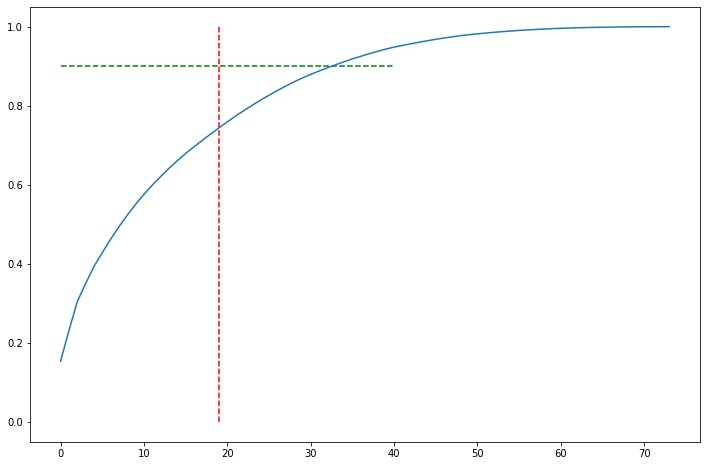

In [396]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=19, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.90, xmax=40, xmin=0, colors="g", linestyles="--")
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

In [397]:
# 90% variance is explained by 19 components. Lets use these to build model

from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=45)

In [398]:
# Fit and transform for 19 components

X_train_pca = pca_final.fit_transform(X_train)
X_test_pca = pca_final.fit_transform(X_test)

In [399]:
# Lets try Logistic Regression
# class_weight will take care of class imbalance

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight='balanced')

logreg.fit(X_train_pca, y_train)

C:\Users\adi00\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [400]:
# lets predict values and find important metrics

y_train_pred_logreg = logreg.predict(X_train_pca)
accuracy_train_logreg = metrics.accuracy_score(y_train, y_train_pred_logreg)

print('Logistic Regression')
print('Accuracy for train=', accuracy_train_logreg)

recall_train_logreg = metrics.recall_score(y_train, y_train_pred_logreg)
print('Recall for train=', recall_train_logreg)

classification_train_logreg = metrics.classification_report(y_train, y_train_pred_logreg)
print('Classification report for train=')
print(classification_train_logreg)

metrics.confusion_matrix(y_train, y_train_pred_logreg)

Logistic Regression
Accuracy for train= 0.837581902530011
Recall for train= 0.8171620863712844
Classification report for train=
              precision    recall  f1-score   support

       False       0.98      0.84      0.90     19126
        True       0.32      0.82      0.46      1783

    accuracy                           0.84     20909
   macro avg       0.65      0.83      0.68     20909
weighted avg       0.92      0.84      0.87     20909



array([[16056,  3070],
       [  326,  1457]], dtype=int64)

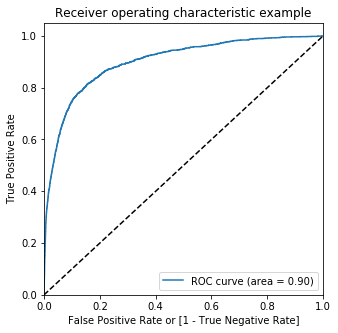

In [401]:
# Checking Roc curve

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

y_train_proba_logreg = logreg.predict_proba(X_train_pca)
y_train_churn_proba_logreg = y_train_proba_logreg[:,1]

draw_roc(y_train, y_train_churn_proba_logreg)

In [402]:
# Finding optimal cutoff
# Let's create columns with different probability cutoffs 

y_train_pred_final_df = pd.DataFrame(y_train_proba_logreg[:,1], columns=['Churn_Proba'])
y_train_pred_final_df['Actual_Churn'] = np.array(y_train)

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final_df[i]= y_train_pred_final_df.Churn_Proba.map(lambda x: 1 if x > i else 0)
y_train_pred_final_df['Churn'] = y_train_pred_logreg

In [403]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final_df.Actual_Churn, y_train_pred_final_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.085274  1.000000  0.000000
0.1   0.1  0.395619  0.977005  0.341420
0.2   0.2  0.578794  0.943915  0.544756
0.3   0.3  0.698312  0.902412  0.679285
0.4   0.4  0.780334  0.868761  0.772090
0.5   0.5  0.837582  0.817162  0.839486
0.6   0.6  0.879813  0.762199  0.890777
0.7   0.7  0.905017  0.688727  0.925180
0.8   0.8  0.922761  0.559170  0.956656
0.9   0.9  0.933617  0.398205  0.983530


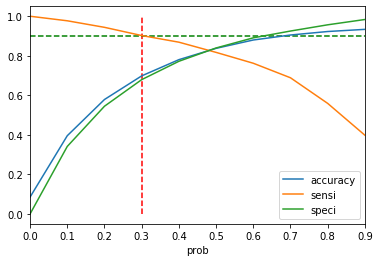

In [404]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.vlines(x=0.30, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.90, xmax=0.9, xmin=0, colors="g", linestyles="--")
plt.show()

In [405]:
# At threshold of 0.30, we see Sensitivity is at 0.85, Accuracy is at 0.7 and Specificity is at 0.7
# As we have learnt that retaining the customer is more important, we can choose this model

y_test_proba_logreg = logreg.predict_proba(X_test_pca)
y_test_churn_proba_logreg = y_test_proba_logreg[:,1]
y_test_pred_logreg = y_test_churn_proba_logreg >= 0.30

accuracy_test_logreg = metrics.accuracy_score(y_test, y_test_pred_logreg)

print('Logistic Regression (Test)')
print('Accuracy for test=', accuracy_test_logreg)

recall_test_logreg = metrics.recall_score(y_test, y_test_pred_logreg)
print('Recall for test=', recall_test_logreg)


classification_test_logreg = metrics.classification_report(y_test, y_test_pred_logreg)
print('Classification report for train=')
print(classification_test_logreg)

Logistic Regression (Test)
Accuracy for test= 0.7173621959384066
Recall for test= 0.855072463768116
Classification report for train=
              precision    recall  f1-score   support

       False       0.98      0.70      0.82      8203
        True       0.21      0.86      0.34       759

    accuracy                           0.72      8962
   macro avg       0.60      0.78      0.58      8962
weighted avg       0.92      0.72      0.78      8962



In [406]:

metrics.confusion_matrix(y_test, y_test_pred_logreg)

array([[5780, 2423],
       [ 110,  649]], dtype=int64)

Logistic regression is giving decent results with cut off 0.3. Lets try other algorithms

## Bernoulli

In [407]:
from sklearn.naive_bayes import BernoulliNB

# instantiate bernoulli NB object
bnb = BernoulliNB()

# fit 
bnb.fit(X_train_pca, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [408]:
y_train_pred_bnb = bnb.predict(X_train_pca)
accuracy_bnb = metrics.accuracy_score(y_train, y_train_pred_bnb)

print('BernoulliNB accuracy:', accuracy_bnb)

BernoulliNB accuracy: 0.9232866229853173


In [409]:
recall_bnb = metrics.recall_score(y_train, y_train_pred_bnb)
print(recall_bnb)

metrics.confusion_matrix(y_train, y_train_pred_bnb)

0.16657319125070105


array([[19008,   118],
       [ 1486,   297]], dtype=int64)

BernoulliNB is giving bad results so we will not use this for our modelling.

In [410]:
from sklearn.svm import SVC
svc = SVC(C=10, gamma=0.1, kernel="rbf", class_weight='balanced')
svc.fit(X_train_pca, y_train)

SVC(C=10, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [411]:
y_test_pred_svc = svc.predict(X_test_pca)
accuracy_svc = metrics.accuracy_score(y_test, y_test_pred_svc)

print('SVC accuracy:', accuracy_svc)

SVC accuracy: 0.9151975005579112


In [412]:
recall_svc = metrics.recall_score(y_test, y_test_pred_svc)
print(recall_svc)

metrics.confusion_matrix(y_test, y_test_pred_svc)

0.05533596837944664


array([[8160,   43],
       [ 717,   42]], dtype=int64)

In [413]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight='balanced')

In [414]:
rfc.fit(X_train_pca,y_train)
y_pred_rfc = rfc.predict(X_test_pca)
accuracy_rfc = metrics.accuracy_score(y_test, y_pred_rfc)

print('RFC accuracy:', accuracy_rfc)

C:\Users\adi00\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RFC accuracy: 0.9203302834188797


In [415]:
recall_rfc = metrics.recall_score(y_test, y_pred_rfc)
print(recall_rfc)

metrics.confusion_matrix(y_test, y_pred_rfc)

0.10013175230566534


array([[8172,   31],
       [ 683,   76]], dtype=int64)

In [416]:
# Hyper parameter tuning

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'min_samples_leaf': [500, 1000, 1500, 2000],
    'min_samples_split': [500, 1000, 1500, 2000],
    'n_estimators': [50,100,200,300]    
}
# Create a based model
rf = RandomForestClassifier(class_weight='balanced', max_features=10, max_depth=10)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1,verbose = 1, scoring='recall')

In [417]:
# Fit the grid search to the data
grid_search.fit(X_train_pca, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 14.9min
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed: 21.3min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=10,
                                              max_features=10,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                   

In [418]:
# scores of GridSearch CV
scores = grid_search.cv_results_
scores_df = pd.DataFrame(scores)
scores_df[scores_df.rank_test_score == 1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
46,16.05046,0.221925,0.174134,0.050688,1500,2000,200,"{'min_samples_leaf': 1500, 'min_samples_split'...",0.826331,0.792717,0.837535,0.814607,0.817416,0.817722,0.014844,1


In [420]:
rf = RandomForestClassifier(max_depth=10,max_features=10,min_samples_leaf=1500,min_samples_split=2000,n_estimators=200,
                           class_weight='balanced')
rf.fit(X_train_pca, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=10, max_features=10,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1500,
                       min_samples_split=2000, min_weight_fraction_leaf=0.0,
                       n_estimators=200, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [421]:
y_pred_rfc = rf.predict(X_test_pca)
accuracy_rfc = metrics.accuracy_score(y_test, y_pred_rfc)

print('RFC accuracy:', accuracy_rfc)

recall_rfc = metrics.recall_score(y_test, y_pred_rfc)
print(recall_rfc)

metrics.confusion_matrix(y_test, y_pred_rfc)

RFC accuracy: 0.8301718366436064
0.764163372859025


array([[6860, 1343],
       [ 179,  580]], dtype=int64)

In [422]:
param_grid = {
    'n_estimators': [50,100,200]
}
# Create a based model
rf = RandomForestClassifier(class_weight='balanced', max_features=10)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1, scoring='recall')

In [423]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

xgboost_model = XGBClassifier()
xgboost_model.fit(X_train_pca, y_train)

y_pred_xgboost = xgboost_model.predict(X_test_pca)

accuracy_xgboost = metrics.accuracy_score(y_test, y_pred_xgboost)

print('XGB accuracy:', accuracy_xgboost)

XGB accuracy: 0.9280294577103325


In [424]:
(len(y_test) - y_test.sum())/len(y_test)

0.9153090827940192

In [426]:
recall_xgboost = metrics.recall_score(y_test, y_pred_xgboost)
print(recall_xgboost)

metrics.confusion_matrix(y_test, y_pred_xgboost)

0.27009222661396576


array([[8112,   91],
       [ 554,  205]], dtype=int64)

In [427]:
# HP tuning for XGBoost

import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'n_estimators': [300,400,500],
    'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200, class_weight='balanced')

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'recall', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      


model_cv.fit(X_train, y_train) 

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed: 12.6min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     class_weight='balanced',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=2, min_child_weight=1,
                                     missing=None, n_estimators=200, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'learning_rate': [0.2, 0.6],
                         'n_estimators': [300, 400,

In [428]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,8.603316,0.412623,0.077471,0.019269,0.2,300,0.3,"{'learning_rate': 0.2, 'n_estimators': 300, 's...",0.519328,0.526936,0.491582,0.512616,0.015193,4,0.643098,0.631623,0.637511,0.637410,0.004685
1,10.925106,0.043155,0.074799,0.012928,0.2,300,0.6,"{'learning_rate': 0.2, 'n_estimators': 300, 's...",0.487395,0.542088,0.483165,0.504214,0.026834,9,0.650673,0.647603,0.654331,0.650869,0.002750
2,11.254574,0.183155,0.059530,0.000463,0.2,300,0.9,"{'learning_rate': 0.2, 'n_estimators': 300, 's...",0.489076,0.538721,0.498316,0.508702,0.021557,7,0.644781,0.655172,0.650126,0.650027,0.004243
3,10.972312,0.010628,0.087434,0.007299,0.2,400,0.3,"{'learning_rate': 0.2, 'n_estimators': 400, 's...",0.507563,0.545455,0.493266,0.515427,0.022019,3,0.669192,0.670311,0.653490,0.664331,0.007679
4,14.577073,0.359618,0.089747,0.006670,0.2,400,0.6,"{'learning_rate': 0.2, 'n_estimators': 400, 's...",0.502521,0.543771,0.488215,0.511502,0.023552,5,0.697811,0.688814,0.688814,0.691813,0.004241
5,14.350955,0.260227,0.083452,0.009395,0.2,400,0.9,"{'learning_rate': 0.2, 'n_estimators': 400, 's...",0.487395,0.537037,0.488215,0.504214,0.023210,9,0.682660,0.693860,0.690496,0.689006,0.004692
6,15.113568,1.883432,0.113031,0.010843,0.2,500,0.3,"{'learning_rate': 0.2, 'n_estimators': 500, 's...",0.502521,0.533670,0.498316,0.511502,0.015768,5,0.710438,0.706476,0.684609,0.700508,0.011358
7,19.116192,0.166309,0.114360,0.012332,0.2,500,0.6,"{'learning_rate': 0.2, 'n_estimators': 500, 's...",0.510924,0.553872,0.496633,0.520476,0.024323,1,0.728114,0.741800,0.727502,0.732472,0.006600
8,18.984877,0.169886,0.120678,0.038091,0.2,500,0.9,"{'learning_rate': 0.2, 'n_estimators': 500, 's...",0.495798,0.537037,0.489899,0.507577,0.020969,8,0.727273,0.731707,0.740118,0.733033,0.005327
9,9.211690,0.432180,0.072475,0.009153,0.6,300,0.3,"{'learning_rate': 0.6, 'n_estimators': 300, 's...",0.482353,0.523569,0.466330,0.490750,0.024109,17,0.729798,0.721615,0.733389,0.728267,0.004927


In [429]:
df = df.drop('aon_mon', axis=1)

In [192]:
df['aon_mon_cat'] = df['aon_mon_cat'].astype(float)

## Without PCA

In [243]:
# split train and test records

X = df.drop('churn', axis=1)
y = df.churn

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [244]:
col = X_train.columns
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=col)
X_test = pd.DataFrame(X_test, columns=col)

In [245]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight='balanced')

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

C:\Users\adi00\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\adi00\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\adi00\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\adi00\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\adi00\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

[('chg_std_ic_mou', False, 7),
 ('chg_loc_ic_t2t_mou', True, 1),
 ('chg_roam_ic_mou', False, 4),
 ('chg_spl_og_mou', False, 15),
 ('chg_vol_3g_mb', False, 2),
 ('chg_std_ic_t2f_mou', False, 21),
 ('chg_offnet_mou', False, 12),
 ('chg_loc_og_t2c_mou', False, 9),
 ('chg_last_day_rch_amt', True, 1),
 ('chg_std_og_mou', True, 1),
 ('chg_loc_og_t2f_mou', False, 5),
 ('chg_total_og_mou', True, 1),
 ('chg_std_og_t2t_mou', True, 1),
 ('chg_loc_og_t2t_mou', False, 22),
 ('chg_vol_2g_mb', False, 8),
 ('chg_loc_ic_t2f_mou', False, 13),
 ('chg_std_og_t2f_mou', False, 19),
 ('chg_total_rech_num', True, 1),
 ('chg_onnet_mou', True, 1),
 ('chg_loc_og_t2m_mou', True, 1),
 ('chg_loc_og_mou', True, 1),
 ('chg_max_rech_amt', False, 20),
 ('chg_ic_others', False, 16),
 ('chg_loc_ic_t2m_mou', True, 1),
 ('chg_roam_og_mou', False, 14),
 ('chg_std_ic_t2t_mou', False, 17),
 ('chg_sachet_2g', False, 3),
 ('chg_std_ic_t2m_mou', False, 6),
 ('chg_isd_ic_mou', False, 18),
 ('chg_total_rech_amt', True, 1),
 ('chg_

In [246]:
col = X_train.columns[rfe.support_]
col

Index(['chg_loc_ic_t2t_mou', 'chg_last_day_rch_amt', 'chg_std_og_mou', 'chg_total_og_mou', 'chg_std_og_t2t_mou', 'chg_total_rech_num', 'chg_onnet_mou', 'chg_loc_og_t2m_mou', 'chg_loc_og_mou', 'chg_loc_ic_t2m_mou', 'chg_total_rech_amt', 'chg_std_og_t2m_mou', 'chg_loc_ic_mou', 'chg_total_ic_mou', 'aon_mon_cat'], dtype='object')

In [256]:
y_train = y_train.values.reshape(-1,1)

In [257]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                20909
Model:                            GLM   Df Residuals:                    20893
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4194.6
Date:                Tue, 25 Aug 2020   Deviance:                       8389.2
Time:                        00:08:45   Pearson chi2:                 2.50e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -3.0968      0.039    -79.469      0.000      -3.173      -3.020
chg_loc_ic_t2t_mou      -0.1455      0.051     -2.832      0.005      -0.246      -0.045
chg_last_day_rch_amt    -0.3204      0.035     -9.230      0.000      -0.388      -0.252
chg_std_og_mou           0.7845      0.111      7.079      0.000       0.567       1.002
chg_total_og_mou        -0.9354      0.071    -13.141      0.000      -1.075      -0.796
chg_std_og_t2t_mou      -0.4060      0.094     -4.322      0.000      -0.590      -0.222
chg_total_rech_num      -0.2602      0.036     -7.226      0.000      -0.331      -0.190
chg_onnet_mou            0.1863      0.088      2.119      0.034       0.014       0.359
chg_loc_og_t2m_mou       0.1867      0.080      2.342      0.019       0.030       0.343
chg_loc_og_mou           0.2634      0.092      2.850      0.004       0.082       0.445
chg_loc_ic_t2m_mou      -0.2826      0.079     -3.577      0.000      -0.437      -0.128
chg_total_rech_amt      -0.3295      0.047     -6.958      0.000      -0.422      -0.237
chg_std_og_t2m_mou      -0.2615      0.063     -4.135      0.000      -0.385      -0.138
chg_loc_ic_mou           0.4907      0.106      4.651      0.000       0.284       0.697
chg_total_ic_mou        -0.4813      0.050     -9.594      0.000      -0.580      -0.383
aon_mon_cat             -0.2941      0.031     -9.568      0.000      -0.354      -0.234
========================================================================================
"""

In [198]:
col

Index(['chg_roam_ic_mou', 'chg_spl_og_mou', 'chg_loc_og_t2c_mou', 'chg_last_day_rch_amt', 'chg_loc_og_t2f_mou', 'chg_loc_ic_t2f_mou', 'chg_std_og_t2f_mou', 'chg_total_rech_num', 'chg_max_rech_amt', 'chg_ic_others', 'chg_sachet_2g', 'chg_isd_ic_mou', 'chg_loc_ic_mou', 'chg_total_ic_mou', 'aon_mon_cat'], dtype='object')

In [206]:
col = ['chg_roam_ic_mou', 'chg_spl_og_mou', 'chg_loc_og_t2c_mou', 'chg_last_day_rch_amt', 'chg_loc_og_t2f_mou', 'chg_loc_ic_t2f_mou', 'chg_std_og_t2f_mou', 'chg_total_rech_num', 'chg_max_rech_amt', 'chg_ic_others', 'chg_sachet_2g', 'chg_isd_ic_mou', 'chg_loc_ic_mou', 'chg_total_ic_mou', 'aon_mon_cat']
col.remove('chg_ic_others')

In [207]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20909
Model:                            GLM   Df Residuals:                    20894
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4339.4
Date:                Mon, 24 Aug 2020   Deviance:                       8678.9
Time:                        23:48:06   Pearson chi2:                 2.45e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -2.5440      0.083    -30.490      0.000      -2.708      -2.381
chg_roam_ic_mou          0.0125      0.002      7.574      0.000       0.009       0.016
chg_spl_og_mou          -0.0129      0.005     -2.743      0.006      -0.022      -0.004
chg_loc_og_t2c_mou       0.0255      0.014      1.814      0.070      -0.002       0.053
chg_last_day_rch_amt    -0.0052      0.000    -12.401      0.000      -0.006      -0.004
chg_loc_og_t2f_mou       0.0144      0.006      2.606      0.009       0.004       0.025
chg_loc_ic_t2f_mou       0.0069      0.003      2.514      0.012       0.002       0.012
chg_std_og_t2f_mou       0.0406      0.019      2.136      0.033       0.003       0.078
chg_total_rech_num      -0.1118      0.005    -20.610      0.000      -0.122      -0.101
chg_max_rech_amt        -0.0026      0.000     -8.132      0.000      -0.003      -0.002
chg_sachet_2g           -0.0530      0.037     -1.448      0.148      -0.125       0.019
chg_isd_ic_mou           0.0079      0.003      2.530      0.011       0.002       0.014
chg_loc_ic_mou           0.0036      0.000     12.312      0.000       0.003       0.004
chg_total_ic_mou        -0.0052      0.000    -20.773      0.000      -0.006      -0.005
aon_mon_cat             -0.3094      0.029    -10.629      0.000      -0.366      -0.252
========================================================================================
"""

In [208]:
col.remove('chg_sachet_2g')

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20909
Model:                            GLM   Df Residuals:                    20895
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4340.5
Date:                Mon, 24 Aug 2020   Deviance:                       8681.0
Time:                        23:48:07   Pearson chi2:                 2.46e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -2.5506      0.083    -30.604      0.000      -2.714      -2.387
chg_roam_ic_mou          0.0125      0.002      7.593      0.000       0.009       0.016
chg_spl_og_mou          -0.0130      0.005     -2.758      0.006      -0.022      -0.004
chg_loc_og_t2c_mou       0.0254      0.014      1.812      0.070      -0.002       0.053
chg_last_day_rch_amt    -0.0051      0.000    -12.341      0.000      -0.006      -0.004
chg_loc_og_t2f_mou       0.0145      0.006      2.628      0.009       0.004       0.025
chg_loc_ic_t2f_mou       0.0069      0.003      2.514      0.012       0.002       0.012
chg_std_og_t2f_mou       0.0402      0.019      2.119      0.034       0.003       0.077
chg_total_rech_num      -0.1136      0.005    -21.510      0.000      -0.124      -0.103
chg_max_rech_amt        -0.0026      0.000     -8.184      0.000      -0.003      -0.002
chg_isd_ic_mou           0.0078      0.003      2.506      0.012       0.002       0.014
chg_loc_ic_mou           0.0036      0.000     12.340      0.000       0.003       0.004
chg_total_ic_mou        -0.0052      0.000    -20.774      0.000      -0.006      -0.005
aon_mon_cat             -0.3090      0.029    -10.616      0.000      -0.366      -0.252
========================================================================================
"""

In [210]:
col.remove('chg_loc_og_t2c_mou')

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20909
Model:                            GLM   Df Residuals:                    20896
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4342.1
Date:                Mon, 24 Aug 2020   Deviance:                       8684.3
Time:                        23:48:47   Pearson chi2:                 2.47e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -2.5515      0.083    -30.614      0.000      -2.715      -2.388
chg_roam_ic_mou          0.0126      0.002      7.654      0.000       0.009       0.016
chg_spl_og_mou          -0.0082      0.004     -2.114      0.035      -0.016      -0.001
chg_last_day_rch_amt    -0.0052      0.000    -12.346      0.000      -0.006      -0.004
chg_loc_og_t2f_mou       0.0145      0.006      2.632      0.008       0.004       0.025
chg_loc_ic_t2f_mou       0.0068      0.003      2.495      0.013       0.001       0.012
chg_std_og_t2f_mou       0.0404      0.019      2.129      0.033       0.003       0.078
chg_total_rech_num      -0.1138      0.005    -21.550      0.000      -0.124      -0.103
chg_max_rech_amt        -0.0026      0.000     -8.153      0.000      -0.003      -0.002
chg_isd_ic_mou           0.0080      0.003      2.562      0.010       0.002       0.014
chg_loc_ic_mou           0.0036      0.000     12.419      0.000       0.003       0.004
chg_total_ic_mou        -0.0052      0.000    -20.865      0.000      -0.006      -0.005
aon_mon_cat             -0.3090      0.029    -10.615      0.000      -0.366      -0.252
========================================================================================
"""

In [213]:
# calculate VIF again
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(train_df):
    vif = pd.DataFrame()
    X = train_df
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)

    return vif

In [258]:
calculate_vif(X_train[col])

,Features,VIF
2,chg_std_og_mou,17.22
12,chg_loc_ic_mou,13.27
4,chg_std_og_t2t_mou,11.92
6,chg_onnet_mou,10.09
8,chg_loc_og_mou,10.05
3,chg_total_og_mou,7.40
7,chg_loc_og_t2m_mou,7.27
9,chg_loc_ic_t2m_mou,7.15
11,chg_std_og_t2m_mou,5.76
13,chg_total_ic_mou,3.67


In [260]:
col = list(col)
col.remove('chg_std_og_mou')

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                20909
Model:                            GLM   Df Residuals:                    20894
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4219.5
Date:                Tue, 25 Aug 2020   Deviance:                       8439.1
Time:                        00:10:47   Pearson chi2:                 2.68e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -3.0902      0.039    -79.753      0.000      -3.166      -3.014
chg_loc_ic_t2t_mou      -0.1181      0.051     -2.314      0.021      -0.218      -0.018
chg_last_day_rch_amt    -0.3256      0.034     -9.439      0.000      -0.393      -0.258
chg_total_og_mou        -0.6643      0.060    -11.107      0.000      -0.782      -0.547
chg_std_og_t2t_mou      -0.0346      0.079     -0.437      0.662      -0.190       0.121
chg_total_rech_num      -0.2756      0.036     -7.688      0.000      -0.346      -0.205
chg_onnet_mou            0.1808      0.090      2.014      0.044       0.005       0.357
chg_loc_og_t2m_mou       0.2016      0.081      2.505      0.012       0.044       0.359
chg_loc_og_mou           0.1424      0.092      1.543      0.123      -0.038       0.323
chg_loc_ic_t2m_mou      -0.2596      0.079     -3.297      0.001      -0.414      -0.105
chg_total_rech_amt      -0.3298      0.047     -6.999      0.000      -0.422      -0.237
chg_std_og_t2m_mou       0.1223      0.033      3.717      0.000       0.058       0.187
chg_loc_ic_mou           0.5938      0.104      5.712      0.000       0.390       0.798
chg_total_ic_mou        -0.6051      0.047    -12.897      0.000      -0.697      -0.513
aon_mon_cat             -0.2942      0.031     -9.609      0.000      -0.354      -0.234
========================================================================================
"""

In [261]:
col.remove('chg_loc_og_mou')

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                20909
Model:                            GLM   Df Residuals:                    20895
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4220.7
Date:                Tue, 25 Aug 2020   Deviance:                       8441.4
Time:                        00:11:07   Pearson chi2:                 2.69e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -3.0922      0.039    -79.780      0.000      -3.168      -3.016
chg_loc_ic_t2t_mou      -0.1093      0.051     -2.160      0.031      -0.208      -0.010
chg_last_day_rch_amt    -0.3258      0.034     -9.453      0.000      -0.393      -0.258
chg_total_og_mou        -0.6479      0.059    -11.015      0.000      -0.763      -0.533
chg_std_og_t2t_mou      -0.1177      0.058     -2.013      0.044      -0.232      -0.003
chg_total_rech_num      -0.2771      0.036     -7.739      0.000      -0.347      -0.207
chg_onnet_mou            0.2722      0.068      4.022      0.000       0.140       0.405
chg_loc_og_t2m_mou       0.3100      0.039      7.888      0.000       0.233       0.387
chg_loc_ic_t2m_mou      -0.2650      0.078     -3.376      0.001      -0.419      -0.111
chg_total_rech_amt      -0.3371      0.047     -7.197      0.000      -0.429      -0.245
chg_std_og_t2m_mou       0.1173      0.033      3.586      0.000       0.053       0.181
chg_loc_ic_mou           0.6112      0.103      5.930      0.000       0.409       0.813
chg_total_ic_mou        -0.6119      0.047    -13.104      0.000      -0.703      -0.520
aon_mon_cat             -0.2948      0.031     -9.636      0.000      -0.355      -0.235
========================================================================================
"""

In [262]:
calculate_vif(X_train[col])

,Features,VIF
10,chg_loc_ic_mou,12.83
7,chg_loc_ic_t2m_mou,7.13
5,chg_onnet_mou,6.27
2,chg_total_og_mou,5.13
3,chg_std_og_t2t_mou,4.92
11,chg_total_ic_mou,3.27
0,chg_loc_ic_t2t_mou,2.85
8,chg_total_rech_amt,2.67
6,chg_loc_og_t2m_mou,1.95
4,chg_total_rech_num,1.91


In [263]:
col.remove('chg_loc_ic_mou')

calculate_vif(X_train[col])

,Features,VIF
5,chg_onnet_mou,6.10
2,chg_total_og_mou,4.92
3,chg_std_og_t2t_mou,4.89
7,chg_loc_ic_t2m_mou,2.70
8,chg_total_rech_amt,2.67
10,chg_total_ic_mou,2.60
4,chg_total_rech_num,1.91
6,chg_loc_og_t2m_mou,1.91
9,chg_std_og_t2m_mou,1.87
0,chg_loc_ic_t2t_mou,1.68


In [264]:
col.remove('chg_onnet_mou')

calculate_vif(X_train[col])

,Features,VIF
2,chg_total_og_mou,4.42
7,chg_total_rech_amt,2.66
6,chg_loc_ic_t2m_mou,2.62
9,chg_total_ic_mou,2.42
5,chg_loc_og_t2m_mou,1.91
4,chg_total_rech_num,1.90
3,chg_std_og_t2t_mou,1.77
8,chg_std_og_t2m_mou,1.76
0,chg_loc_ic_t2t_mou,1.44
1,chg_last_day_rch_amt,1.21


In [268]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                20909
Model:                            GLM   Df Residuals:                    20897
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4252.5
Date:                Tue, 25 Aug 2020   Deviance:                       8504.9
Time:                        00:12:48   Pearson chi2:                 2.68e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -3.0945      0.039    -79.934      0.000      -3.170      -3.019
chg_loc_ic_t2t_mou       0.1769      0.033      5.298      0.000       0.111       0.242
chg_last_day_rch_amt    -0.3316      0.034     -9.671      0.000      -0.399      -0.264
chg_total_og_mou        -0.6277      0.055    -11.370      0.000      -0.736      -0.520
chg_std_og_t2t_mou       0.0960      0.031      3.074      0.002       0.035       0.157
chg_total_rech_num      -0.2796      0.036     -7.856      0.000      -0.349      -0.210
chg_loc_og_t2m_mou       0.3381      0.039      8.740      0.000       0.262       0.414
chg_loc_ic_t2m_mou       0.1414      0.045      3.123      0.002       0.053       0.230
chg_total_rech_amt      -0.3362      0.047     -7.229      0.000      -0.427      -0.245
chg_std_og_t2m_mou       0.1002      0.031      3.218      0.001       0.039       0.161
chg_total_ic_mou        -0.5545      0.040    -13.837      0.000      -0.633      -0.476
aon_mon_cat             -0.3003      0.030     -9.886      0.000      -0.360      -0.241
========================================================================================
"""

In [269]:
X_test_sm = sm.add_constant(X_test[col])



In [270]:
X_test_sm

,const,chg_loc_ic_t2t_mou,chg_last_day_rch_amt,chg_total_og_mou,chg_std_og_t2t_mou,chg_total_rech_num,chg_loc_og_t2m_mou,chg_loc_ic_t2m_mou,chg_total_rech_amt,chg_std_og_t2m_mou,chg_total_ic_mou,aon_mon_cat
0,1.0,-0.487334,-0.599861,-0.138329,-0.073932,0.235613,0.108607,0.216376,0.159657,-0.486468,0.731314,1.263219
1,1.0,-0.465077,0.412634,2.450283,0.333382,1.629784,0.328749,-0.438619,2.728929,-0.487695,3.022701,0.291237
2,1.0,-0.229408,-0.156894,-0.450552,-0.936329,1.165061,0.071324,-0.334344,-0.171026,-0.186849,-0.638960,-1.652727
3,1.0,-1.485767,-0.112598,-1.296446,0.083966,-0.786778,-2.029060,-0.222761,-0.561141,0.099981,-0.434519,0.291237
4,1.0,1.240480,0.083573,1.167204,3.087608,0.142669,0.190750,0.913716,-0.236553,-3.659226,0.878915,1.263219
...,...,...,...,...,...,...,...,...,...,...,...,...
8957,1.0,0.227903,3.260275,-0.323683,-0.877961,-0.507944,-0.112367,0.045541,-0.512376,0.270486,-0.517594,1.263219
8958,1.0,-0.010200,0.096229,-0.323334,0.049131,-0.415000,0.030206,-0.079767,-0.024733,-1.020106,-0.001323,-0.680745
8959,1.0,0.063063,0.172167,-0.180369,0.053207,-0.136165,-1.292635,-0.025816,-0.276174,0.220188,0.327731,0.291237
8960,1.0,-1.688978,-1.498450,-0.629012,0.024445,0.142669,-1.702335,-1.416313,-1.274319,-0.069382,-1.836161,0.291237


In [271]:
y_pred_proba = res.predict(X_test_sm)

In [275]:
y_pred = y_pred_proba >= 0.3

In [276]:
y_pred.sum()

510

In [277]:
accuracy_test_logreg = metrics.accuracy_score(y_test, y_pred)

print('Logistic Regression (Test)')
print('Accuracy for test=', accuracy_test_logreg)

recall_test_logreg = metrics.recall_score(y_test, y_pred)
print('Recall for test=', recall_test_logreg)

metrics.confusion_matrix(y_test, y_pred)

Logistic Regression (Test)
Accuracy for test= 0.922896674849364
Recall for test= 0.380764163372859


array([[7982,  221],
       [ 470,  289]], dtype=int64)